In [1]:
import uclchem, os, constants
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Functions

In [2]:
def makeDataframe(filePath: str, tdf):
    df = uclchem.analysis.read_output_file(filePath)
    fName=filePath.split('/')
    df['runName']=fName[-1]

    for prop in tdf.columns:
        if prop == constants.SHOCKVEL: df[prop]=tdf.at[filePath,prop]
    return df

In [3]:
def scatterGrid(df, species, physical, title, scale=None):
    fig, axs = plt.subplots(len(species), len(physical), figsize=(len(physical)*5, len(species)*5))
    for i, spec in enumerate(species):
        for j, phys in enumerate(physical):
            sns.scatterplot(df,x=spec,y=phys,ax=axs[i][j], hue='runName', palette='Spectral',
                            legend= 'auto' if i==0 and j==len(physical)-1 else None)
            if scale:
                axs[i][j].set_xscale(scale)
                axs[i][j].set_yscale(scale)
    
    sns.move_legend(axs[0][len(physical)-1], "upper left", bbox_to_anchor=(1, 1))
    fig.suptitle(title, size='xx-large')
    return fig

# Prep

In [4]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Grid/2024-07-01_{}/{}/'

tdf = pd.read_csv(folder.format('124848', "stage2_df.csv")[:-1], index_col=0)
tdf.index = tdf['outputFile']
li=[f for f in os.listdir(folder.format('124848', constants.PHASE2)) if 'startcollapse' not in f]
df_sh = pd.concat([makeDataframe(folder.format('124848', constants.PHASE2)+gg, tdf) for gg in li])

tdf = pd.read_csv(folder.format('134429', "stage2_df.csv")[:-1], index_col=0)
tdf.index = tdf['outputFile']
li=[f for f in os.listdir(folder.format('134429', constants.PHASE2)) if 'startcollapse' not in f]
df_hc = pd.concat([makeDataframe(folder.format('134429', constants.PHASE2)+gg, tdf) for gg in li])

# hydrogen=['H', '#H', 'H+', '@H', 'H2', '#H2', 'H2+', '@H2']
species=['#CH3OH', 'CH3OH', '@CH3OH', '#SIO', 'SIO', '@SIO']
physical=['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield']

In [5]:
# df['nH2'] = df['H2']+df['#H2']+df['H2+']+df['@H2']
df_sh= df_sh.loc[:,physical+[constants.SHOCKVEL]+species+['runName']]
df_hc= df_hc.loc[:,physical+species+['runName']]

# Shock

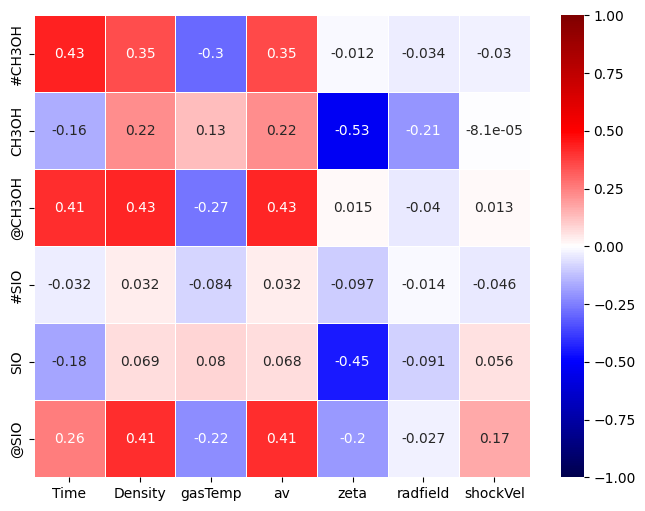

In [6]:
physical= physical if constants.SHOCKVEL in physical else physical+[constants.SHOCKVEL]
cor = df_sh.loc[:,df_sh.columns[:-1]].corr()
barrera=0

cor=cor[cor.abs().ge(barrera)].loc[:,physical][7:].dropna(how='all')

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap="seismic", linewidths=.5)

In [7]:
scatterGrid(df_sh, species, physical, 'C Shock Grid', 'log').savefig(folder.format('124848', 'scatterGrid_log.png')[:-1], dpi=300,bbox_inches='tight')

# Hot Core

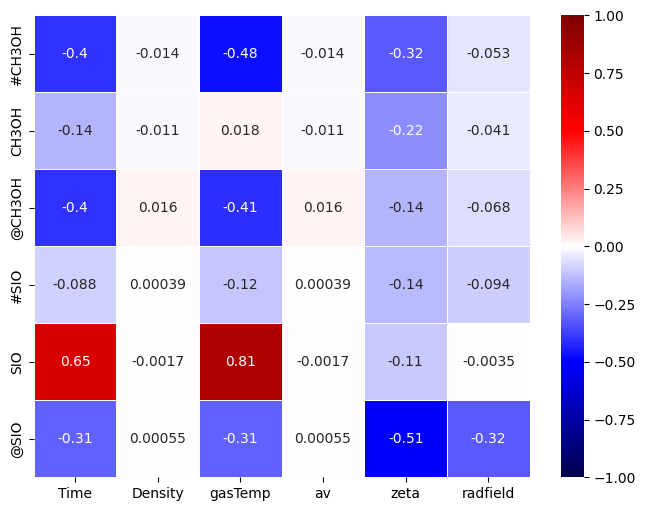

In [ ]:
physical = [p for p in physical if p != constants.SHOCKVEL]
cor = df_hc.loc[:,df_hc.columns[:-1]].corr()
barrera=0

cor=cor[cor.abs().ge(barrera)].loc[:,physical][6:].dropna(how='all')

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap="seismic", linewidths=.5)

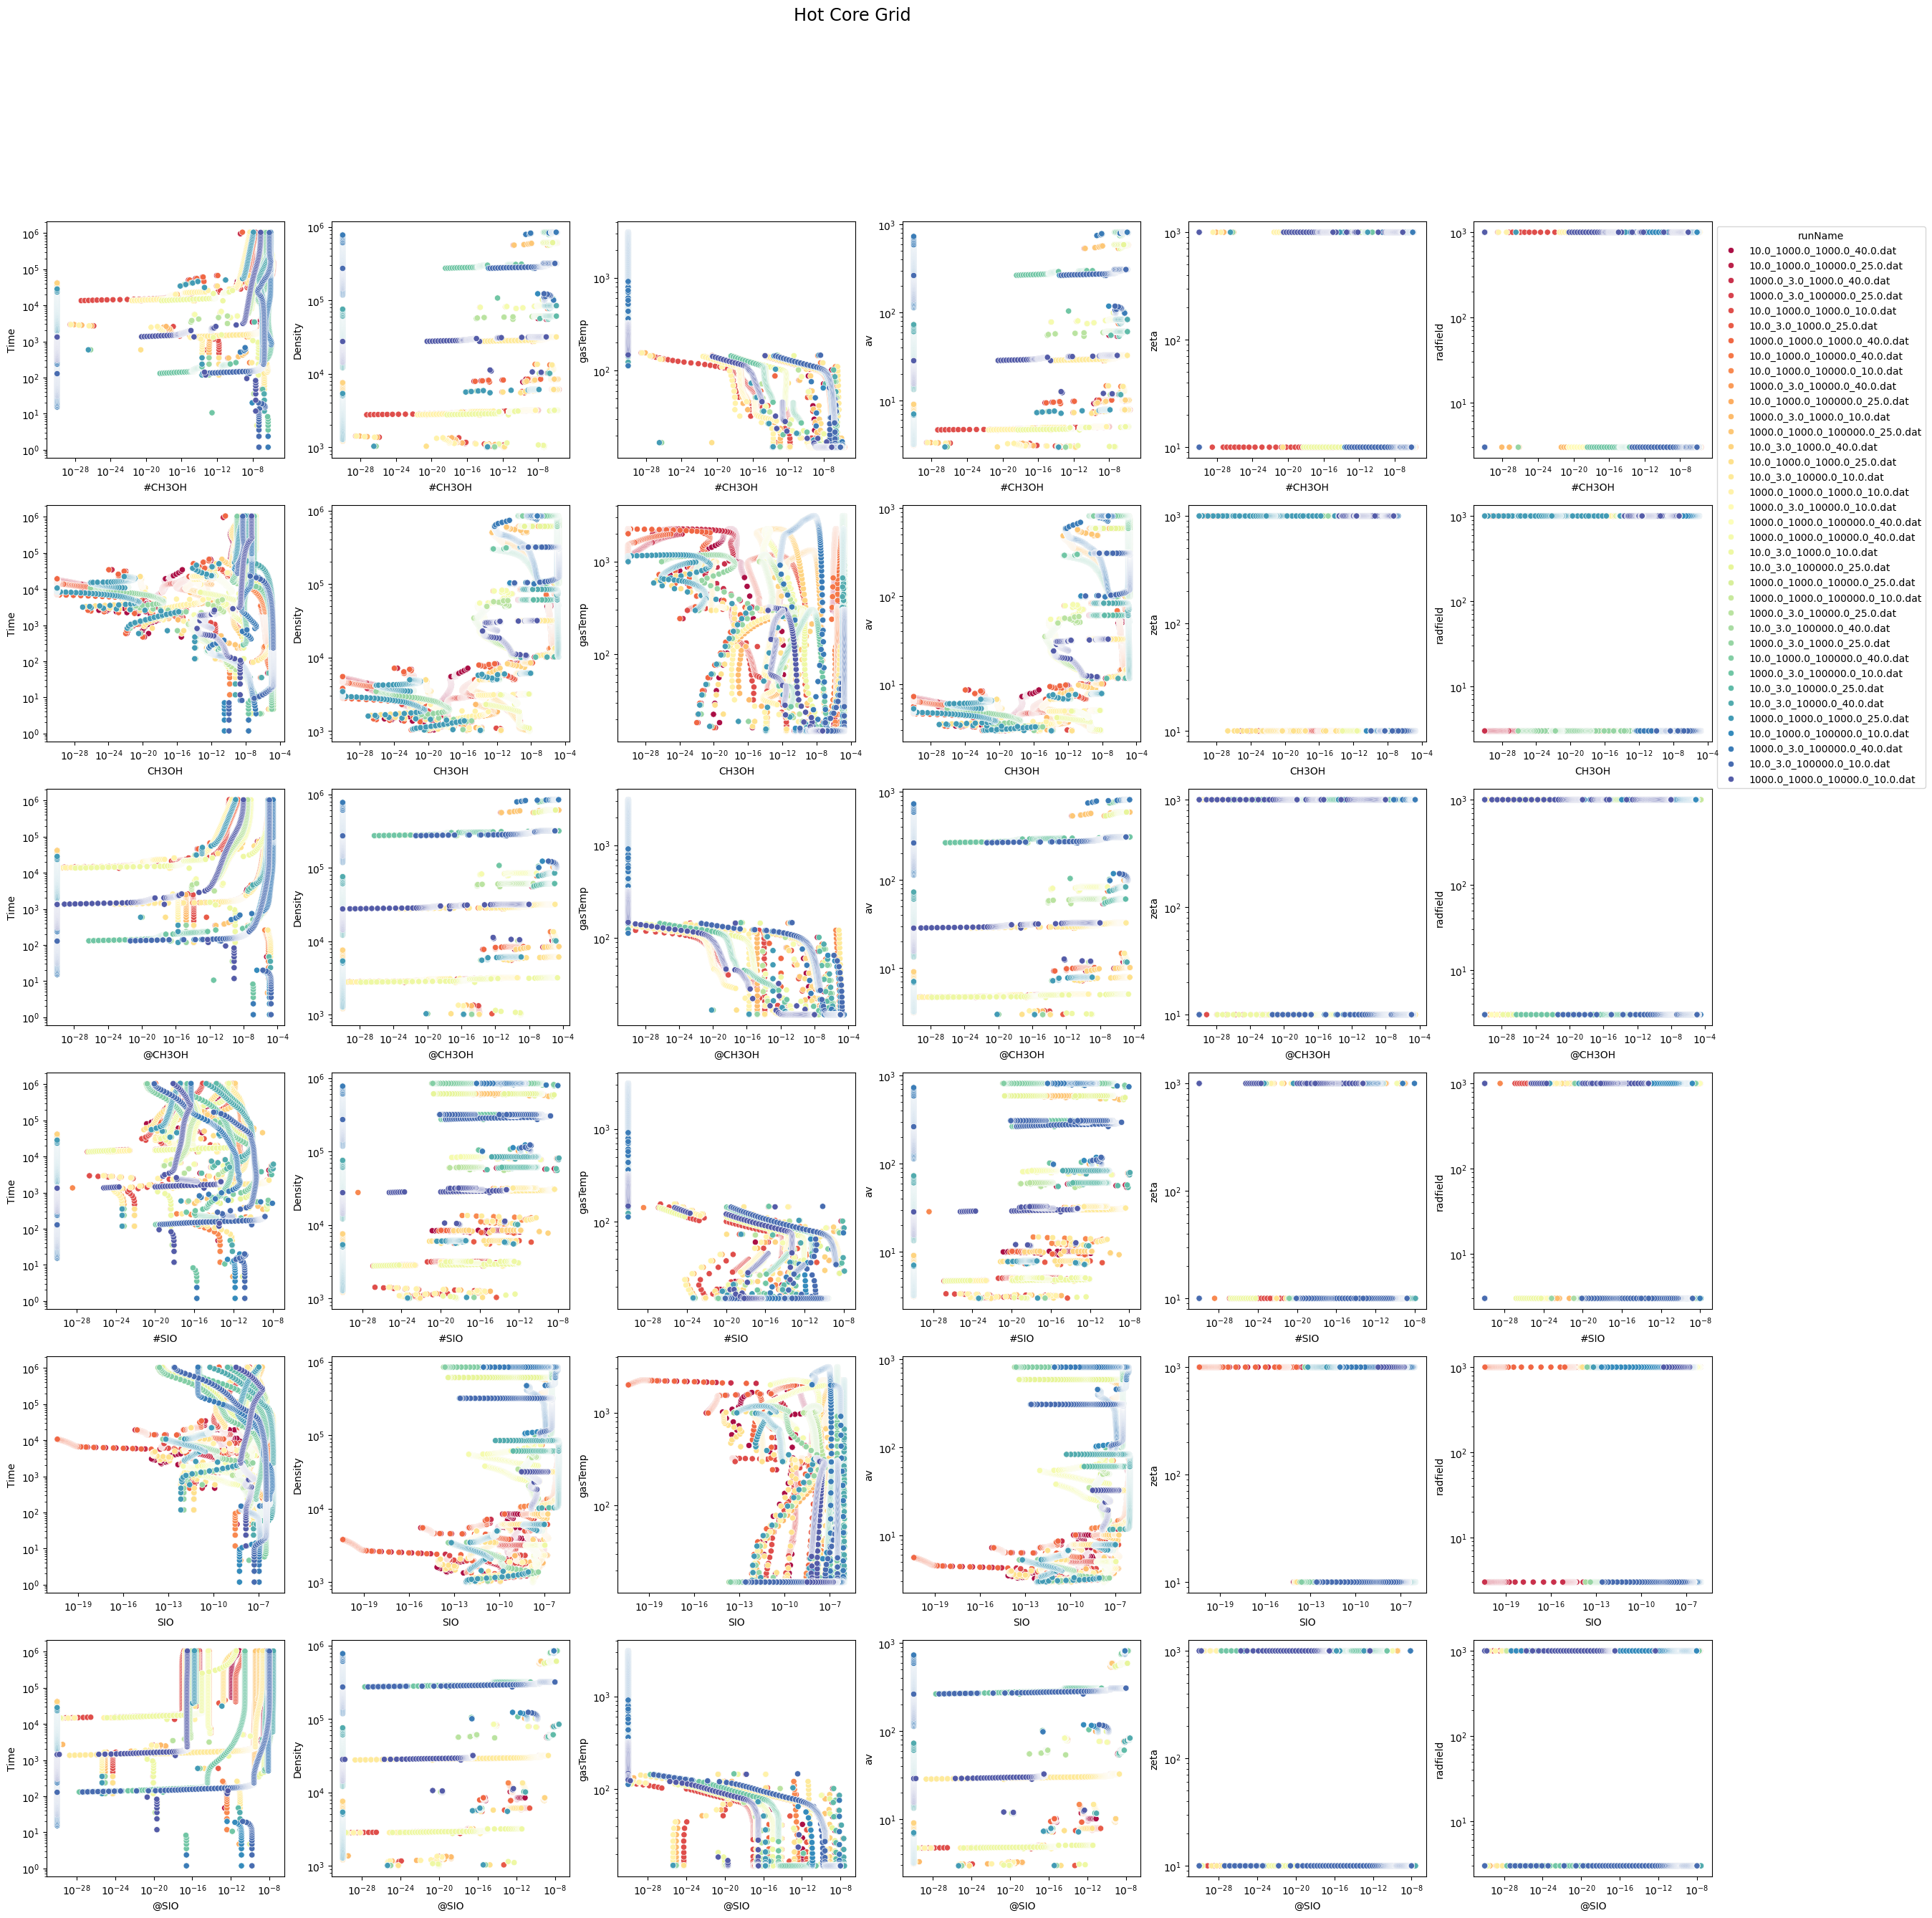

In [ ]:
scatterGrid(df_sh, species, physical, 'Hot Core Grid', 'log').savefig(folder.format('134429', 'scatterGrid_log.png')[:-1], dpi=300,bbox_inches='tight')

# misc